# Fitting gaussians profile

The only goal of this notebook is to receive a convoluted profile and fitted with n gaussians, so I can use that values as initial values for stan in R or Mathematica.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
class StellarProfile:
    
    def __init__(self, profile_path:str, m:int, args_init:list=None, method:str=None, print_sol:bool=False):
        """
        profile_path = path to the input profile, str.
        m = number of gaussians to fit, int.
        args_init = initial values, default None
        method = method pass to minimize function, str. default None.
        print_sol = print minimize solution for debuggin purposes, bool. default False.
        """
        self.m = m
        self.wave, self.flux = np.loadtxt(profile_path, unpack=True)
        self.args_init = args_init
        self.method=method
        self.print_sol=print_sol
        
        if self.args_init is None:
            self.args_init = []
            for i in range(m):
                self.args_init.append(0.0)
                self.args_init.append(-5.0+i*10/(m-1))
                self.args_init.append(1.0)

        self.args_fit = self.fit_n_gauss(self.wave, self.flux, self.args_init, method=self.method,
                                         print_sol=self.print_sol)
        
        self.do_plot()

    def gauss(self, x, args):
        """compute a gaussian profile with parameters a,b,c given in args"""
        """args must be an array of length 3 (args = [a,b,c])"""
        a,b,c = args
        return a * np.exp(-((x-b)/c)**2 / 2)

    def n_gauss(self, x, args):
        """This one can compute a multigaussian profile"""
        """the number of gaussians depend on the length of args, being the int part of args/3"""
        """for example args=[a1,b1,c1,a2,b2,c2] will return a two gaussian profile with parameters"""
        """a1,b1,c1 and a2,b2,c2 respectively"""
        number_of_gauss = len(args) // 3
        out = np.zeros(len(x))
        for n in range(number_of_gauss):
            out += self.gauss(x,args[n*3:(n+1)*3])
        return out

    def fit_n_gauss(self, x, y, args_init, method, print_sol):
        """this one simply find the n_gaussian profile that best fit the profile given by x and y"""
        """uses the minimize function from scipy.optimize, with the default method but you can give"""
        """a method with the parameter method"""
        """the args_init parameter correspond to an array which length will tell the function how many"""
        """gaussians fit, and also will act as initial guess for the minimize function, so chose values"""
        """which are relative close to the expected best ones."""

        def chi_sqr(theta, x, y):
            y_mod = self.n_gauss(x,theta)
            return np.sum((y-y_mod)**2)

        sol = minimize(chi_sqr, x0 = args_init, args=(x,y), method=method)
        if print_sol:
            print(sol)
        params = sol.x
        return params
    
    def do_plot(self):
        
        y_fit = self.n_gauss(self.wave, self.args_fit)
        
        fig, axs = plt.subplots(figsize=(7.7,4.8), dpi=80)
        
        axs.plot(self.wave, self.flux, label='original')
        axs.plot(self.wave, y_fit, label='fit')
        axs.set_xlabel(r'$\Delta$ Wavelength [$\rm\AA$]')
        axs.set_ylabel('Normalized Flux - 1')
        axs.legend(loc=0)
        
        plt.show()
        
    def print_params(self):
        
        for i in range(self.m):
            args = self.args_fit[3*i:3*(i+1)]
            print('Gaussian {}:'.format(i+1))
            print('\ta : {:.2f}'.format(args[0]))
            print('\tb : {:.2f}'.format(args[1]))
            print('\tc : {:.2f}'.format(args[2]))

      fun: 0.00734213507372049
 hess_inv: <12x12 LbfgsInvHessProduct with dtype=float64>
      jac: array([-3.83985378e-05,  3.98512822e-05,  2.55961053e-05, -3.73294277e-05,
        4.28185268e-05, -4.59754633e-05,  3.52548719e-05, -1.94033159e-05,
       -1.87356208e-05, -1.05819867e-05, -2.63171431e-05,  7.12155166e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 1209
      nit: 82
     njev: 93
   status: 0
  success: True
        x: array([-0.03735595, -5.14529602,  1.64214565, -0.05257451, -1.70037841,
        1.71397454, -0.05149995,  1.70369269,  1.7062885 , -0.03438609,
        5.02885964,  1.49025986])


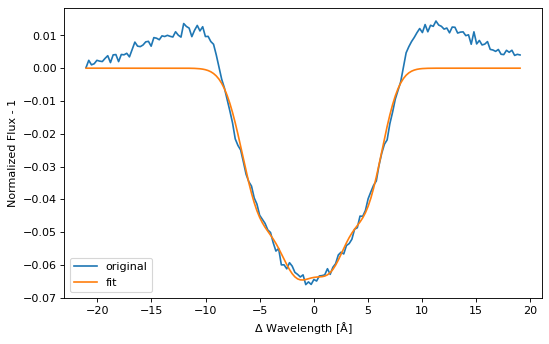

Gaussian 1:
	a : -0.04
	b : -5.15
	c : 1.64
Gaussian 2:
	a : -0.05
	b : -1.70
	c : 1.71
Gaussian 3:
	a : -0.05
	b : 1.70
	c : 1.71
Gaussian 4:
	a : -0.03
	b : 5.03
	c : 1.49


In [3]:
input_path = '/home/lientur/DoctoradoUV/Investigation/deconvolution/rstan/abs_vsini_400_noise_1e-3.dat'
m = 4
stellarprofile = StellarProfile(input_path, m, method='L-BFGS-B', print_sol=True)
stellarprofile.print_params()

In [4]:
14/30 * 80/13000

0.002871794871794872